# Hypothesis Testting

I practiced discrete and continous distributions, and we will use them to test hypotheses. Hypothsis testing is a way to test a claim about a population parameter. We will use the following steps to test a hypothesis:

1. State the null and alternative hypotheses
2. Choose a significance level
3. Compute the test statistic
4. Make a decision

### Import Libraries

In [1]:
import numpy as np # to perform numerical operations
import pandas as pd # to read and manipulate data
import matplotlib.pyplot as plt # to plot data
import seaborn as sns # to plot data
import os # to read files
import sys # to read files
dir = os.environ['ALPHA_1'] # to read files
sys.path.append(dir) # to read files
from pathlib import Path # to read files
import pyarrow

import scipy.stats as stats # to perform statistical operations
from statsmodels.stats.proportion import proportions_ztest # to perform statistical operations
from statsmodels.stats.power import TTestIndPower # to determine sample size
from scipy.stats import chisquare # to perform statistical operations
import pingouin as pg # to perform statistical operations
import warnings
warnings.filterwarnings('ignore')

import basic.basic_functions as bf # to perform basic functions

In [2]:
# Connecting Folders
base_folder,data,archive,output = bf.set_folders()

Not Running on Colab
Base Folder is C:\Users\abdul\OneDrive\Documents\MSBA
Data Folder is C:\Users\abdul\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\abdul\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\abdul\OneDrive\Documents\MSBA\output
The path to the custom functions is C:/Users/abdul/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\abdul\OneDrive\Documents\MSBA\notebooks\Statistics


### Load Data

Feather files are a fast and efficient way to store data. They are a binary file format for storing data frames. They are useful for storing large data sets that you will use repeatedly. You can read more about them [here](https://blog.rstudio.com/2016/03/29/feather/).

In [4]:
late_shipments = pd.read_feather(data/'late_shipments.feather')
sample_dem_data = pd.read_feather(data/'dem_votes_potus_12_16.feather')
late_shipments = late_shipments[late_shipments['vendor_inco_term'] != 'DDU']

## Simple Hypothesis Test

As discussed above the steps to test a hypothesis are:

1. State the null and alternative hypotheses
2. Choose a significance level
3. Compute the test statistic
4. Make a decision

We will start with a simple hypothesis test. Some terms that are important to understand are:

* **Null Hypothesis**: The null hypothesis is the hypothesis that we are testing. It is the hypothesis that we believe to be true. The null hypothesis is always a statement about a population parameter. For example, the null hypothesis could be that the mean of a population is equal to a certain value.

* **Alternative Hypothesis**: The alternative hypothesis is the hypothesis that we are testing against. It is the hypothesis that we believe to be false. The alternative hypothesis is always a statement about a population parameter. For example, the alternative hypothesis could be that the mean of a population is not equal to a certain value.

* **Significance Level**: The significance level is the probability of rejecting the null hypothesis when it is true. The significance level is denoted by $\alpha$. The significance level is always a value between 0 and 1. The significance level is also called the level of significance.

* **Test Statistic**: The test statistic is a statistic that is used to test the null hypothesis. The test statistic is always a statistic that is calculated from the sample data. The test statistic is used to determine whether or not to reject the null hypothesis.

* **P-value**: The p-value is the probability of observing a test statistic at least as extreme as the one observed in the sample data, assuming that the null hypothesis is true. The p-value is always a value between 0 and 1. The p-value is used to determine whether or not to reject the null hypothesis.

* **Reject the Null Hypothesis**: Rejecting the null hypothesis means that we have enough evidence to believe that the null hypothesis is false. We reject the null hypothesis when the p-value is less than the significance level.

* **Fail to Reject the Null Hypothesis**: Failing to reject the null hypothesis means that we do not have enough evidence to believe that the null hypothesis is false. We fail to reject the null hypothesis when the p-value is greater than or equal to the significance level.

* **Z-Score**: The z-score is the number of standard deviations that a data point is from the mean. The z-score is always a value between -$\infty$ and $\infty$. The z-score is used to determine the p-value.

In [5]:
# Calculate the proportion of late shipments
late_prop_samp = len(late_shipments[late_shipments['late'] == 'Yes']) / len(late_shipments)


sample = np.random.choice(late_shipments['late'], size = 100, replace = True)
# Hypothesize that the proportion is 6%
late_prop_hyp = np.mean(sample == 'Yes')
# Calculate the standard error
std_error = np.std(sample == 'Yes', ddof = 1) # the ddof = 1 is to calculate the standard deviation of the sample

# Calculate the z-score
z_score = (late_prop_samp - late_prop_hyp) / std_error
print(f'The z-score is {z_score:.2f}.')

The z-score is 0.00.


The null hypothesis, $H_0$ , is that the proportion of late shipments is six percent. The alternative hypothesis, $H_A$ , is that the proportion of late shipments is greater than six percent.

In [6]:
p_value = stats.norm.sf(z_score)
print(f'The p-value is {p_value:.2f}.')

The p-value is 0.50.


If $p < 0.05$, then we reject the null hypothesis. If $p >= 0.05$, then we fail to reject the null hypothesis. Based on the upper and lower bounds of the confidence interval, we can see that the p-value is greater than 0.05. Therefore, we fail to reject the null hypothesis.

Another important thing to be careful of is that the p-value is not the probability that the null hypothesis is true. The p-value is the probability of observing a test statistic at least as extreme as the one observed in the sample data, assuming that the null hypothesis is true.

* **Type I Error**: A type I error is the rejection of a true null hypothesis. A type I error is also called a false positive. The probability of a type I error is equal to the significance level.

* **Type II Error**: A type II error is the failure to reject a false null hypothesis. A type II error is also called a false negative. The probability of a type II error is equal to $\beta$.

## Performing t-tests

T-tests are used to test the null hypothesis that the mean of a population is equal to a certain value. The t-test is used when the population standard deviation is unknown. The t-test is also used when the sample size is small. The t-test is also used when the population distribution is not normal.

The null hypothesis, $H_0$ , is that the mean of the population is equal to 100. The alternative hypothesis, $H_A$ , is that the mean of the population is not equal to 100.

## Performing Two Sample t-tests

Two sample t-tests are used to test the null hypothesis that the means of two populations are equal. The two sample t-test is used when the population standard deviations are unknown. The two sample t-test is also used when the sample sizes are small. The two sample t-test is also used when the population distributions are not normal.

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores. It's called "t", and it can be calculated from three values from each sample using this equation.


$$t = \dfrac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})}{\sqrt{\dfrac{s_{\text{child}}^2}{n_{\text{child}}} + \dfrac{s_{\text{adult}}^2}{n_{\text{adult}}}}}$$


While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

In [7]:
# Calculate the mean weight of late shipments and on-time shipments
xbar_no = np.mean(late_shipments[late_shipments['late'] == 'No']['weight_kilograms'])
xbar_yes = np.mean(late_shipments[late_shipments['late'] == 'Yes']['weight_kilograms'])

# Calculate the standard error 
s_no = np.std(late_shipments[late_shipments['late'] == 'No']['weight_kilograms'], ddof = 1)
s_yes = np.std(late_shipments[late_shipments['late'] == 'Yes']['weight_kilograms'], ddof = 1)
n_no = len(late_shipments[late_shipments['late'] == 'No']['weight_kilograms'])
n_yes = len(late_shipments[late_shipments['late'] == 'Yes']['weight_kilograms'])

$$H_0: \mu_{\text{no}} = \mu_{\text{yes}}$$
$$H_A: \mu_{\text{no}} < \mu_{\text{yes}}$$

In [8]:
# Calculate the numerator of the test statistic
numerator = (xbar_no - xbar_yes)
# Calculate the denominator of the test statistic
denominator = np.sqrt(((s_yes**2)/n_yes) + ((s_no**2)/n_no))
# Calculate the test statistic
t_stat = numerator / denominator
# Print the test statistic
print(f'The test statistic is {t_stat:.2f}.')
# Calculate the p-value
p_value = stats.t.cdf(t_stat, df = n_no + n_yes - 2) 
# Print the p-value
print(f'The p-value is {p_value:.2f}.')
print(f'We reject the null hypothesis that the mean weight of late shipments is the same as the mean weight of on-time shipments.')
print(f'We accept the alternative hypothesis that the mean weight of late shipments is greater than the mean weight of on-time shipments.')

The test statistic is -2.39.
The p-value is 0.01.
We reject the null hypothesis that the mean weight of late shipments is the same as the mean weight of on-time shipments.
We accept the alternative hypothesis that the mean weight of late shipments is greater than the mean weight of on-time shipments.


## Performing Paired t-tests

A paired t-test is a statistical test used to determine whether there is a significant difference between the means of two related samples. This test is particularly useful when comparing two samples that are paired or matched, meaning that the same subjects were included in both samples.

For example, suppose you want to compare the effectiveness of two different treatments for a medical condition. You could select a group of patients and administer Treatment A to half of them and Treatment B to the other half. Then, you would measure the results of both treatments and compare them using a paired t-test.

The paired t-test works by calculating the difference between the two samples for each paired observation, and then calculating the mean and standard deviation of these differences. The t-test statistic is then calculated by dividing the mean difference by the standard deviation of the differences, which gives an estimate of how many standard deviations the mean difference is away from zero.

If the t-test statistic is larger than the critical value of t for the chosen significance level (usually 0.05), then the null hypothesis that there is no significant difference between the two means is rejected. In other words, it can be concluded that the means of the two samples are significantly different.

In summary, a paired t-test is a useful statistical tool for comparing the means of two related samples, and it can help to determine whether a treatment or intervention is effective.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, `sample_dem_data`. Since the counties are the same in both years, these samples are paired. The columns containing the samples are `dem_percent_12` and `dem_percent_16`.

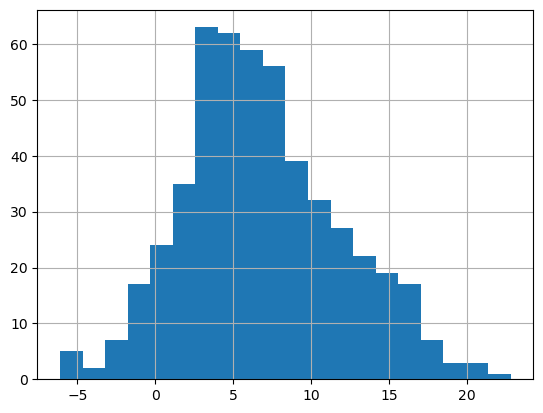

In [9]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']
# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()
# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std(ddof = 1)
# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

$$H_0: \mu_{\text{2012}} = \mu_{\text{2016}}$$
$$H_A: \mu_{\text{2012}}  \not= \mu_{\text{2016}}$$

In [10]:
t_statistic, p_value = stats.ttest_rel(sample_dem_data['dem_percent_12'], sample_dem_data['dem_percent_16'])
print(f'The t-statistic is {t_statistic:.2f} and the p-value is {p_value:.2f}.')
print(f'We reject the null hypothesis that the mean difference in the percentage of votes for the Democratic candidate between 2012 and 2016 is 0.')

The t-statistic is 30.30 and the p-value is 0.00.
We reject the null hypothesis that the mean difference in the percentage of votes for the Democratic candidate between 2012 and 2016 is 0.


In [11]:
# Conduct a t-test on diff
test_results = pg.ttest(x=sample_dem_data['diff'],y=0,alternative='two-sided')
# Print the test results
test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


In [12]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pg.ttest(x=sample_dem_data['dem_percent_12'], 
                              y=sample_dem_data['dem_percent_16'],
                              paired=True
                              ,alternative="two-sided")
# Print the test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


The p-value from the unpaired test is greater than than the p-value from the paired test.

## ANOVA Tests

ANOVA stands for Analysis of Variance and is a statistical test used to analyze whether there is a significant difference between the means of two or more groups. It compares the variance between groups to the variance within groups to determine if the differences are statistically significant. The ANOVA test assumes that the data is normally distributed and that the variances of the groups are equal. There are several types of ANOVA tests, including one-way ANOVA, two-way ANOVA, and repeated measures ANOVA.

The one-way ANOVA is used when there is one independent variable with three or more levels, while the two-way ANOVA is used when there are two independent variables. The repeated measures ANOVA is used when the same group of subjects is measured multiple times.

The output of an ANOVA test includes the F-statistic, which measures the ratio of the variance between groups to the variance within groups. A significant F-value indicates that there is a significant difference between the means of the groups.

Post-hoc tests can be performed after an ANOVA test to determine which groups are significantly different from each other. Examples of post-hoc tests include Tukey's HSD, Bonferroni correction, and Scheffé's method.

ANOVA is a powerful tool for analyzing data with multiple groups, but it is important to carefully interpret the results and ensure that the assumptions of the test are met.

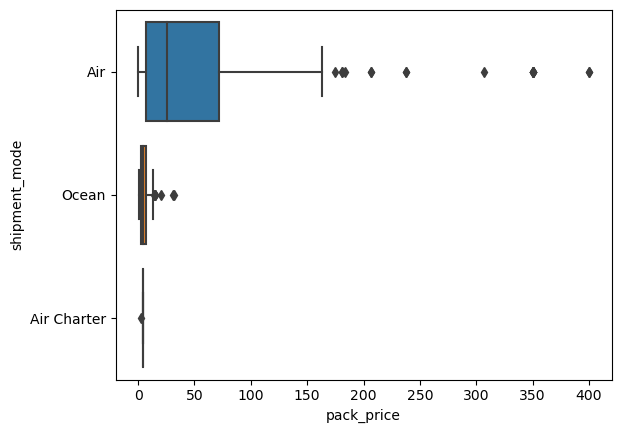

In [13]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price',y='shipment_mode',data=late_shipments)
plt.show()

$H_0$: Pack prices for every category of shipment mode are the same.</br>
$H_A$: Pack prices for some categories of shipment mode are different.</br>
Using a significance level of 0.1.

In [14]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pg.anova(data=late_shipments,dv='pack_price',between='shipment_mode')
# Print anova_results
display(anova_results)
print(f'We reject the null hypothesis that the mean pack_price is the same for all shipment modes.')

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,996,21.831329,5.256696e-10,0.041997


We reject the null hypothesis that the mean pack_price is the same for all shipment modes.


In [15]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pg.pairwise_tests(data=late_shipments,dv='pack_price',between='shipment_mode')
# Print pairwise_results
display(pairwise_results)
print(f'We reject the null hypothesis that the mean pack_price is the same for all shipment modes.')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.153462,601.222302,two-sided,1.160890e-74,3.878e+76,0.726051
1,shipment_mode,Air,Ocean,False,True,19.312655,986.136131,two-sided,9.786259e-71,7.99e+66,0.710612
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


We reject the null hypothesis that the mean pack_price is the same for all shipment modes.


In [16]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pg.pairwise_tests(data=late_shipments, 
                                            dv="pack_price",
                                            between="shipment_mode",
                                            padjust="bonf")
# Print pairwise_results
display(pairwise_results)
print(f'Using the Bonferroni correction results and assuming a significance level of 0.1, we reject the null hypothesis that the mean pack_price is the same for all shipment modes.')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.153462,601.222302,two-sided,1.160890e-74,3.482670e-74,bonf,3.878e+76,0.726051
1,shipment_mode,Air,Ocean,False,True,19.312655,986.136131,two-sided,9.786259e-71,2.935878e-70,bonf,7.99e+66,0.710612
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


Using the Bonferroni correction results and assuming a significance level of 0.1, we reject the null hypothesis that the mean pack_price is the same for all shipment modes.


## One Sample Proportion Test

The one sample proportion test is used to test the null hypothesis that the proportion of successes in a population is equal to a certain value. The one sample proportion test is used when the population distribution is binomial.

In the first question, we calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. We used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

$$z = \dfrac{\hat{p} - p_{0}}{\sqrt{\dfrac{p_{0}*(1-p_{0})}{n}}}$$
where $\hat{p}$ is the sample proportion, $p_{0}$ is the hypothesized proportion, and $n$ is the sample size.

We'll revisit the p-value using this simpler calculation.

In [17]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06
# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()
# Calculate the sample size
n = len(late_shipments)
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)
# Calculate the test statistic
z_score = numerator / denominator
# Calculate the p-value from the z-score
p_value = 1 - stats.norm.cdf(z_score)
# Print the p-value
print(p_value)

0.44384969651518114


## Two sample proportion test

The two sample proportion test is used to test the null hypothesis that the proportion of successes in two populations are equal. The two sample proportion test is used when the population distributions are binomial.

We may wonder if the amount paid for freight affects whether or not the shipment was late. In the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

$$H_0: p_{\text{expensive}} = p_{\text{reasonable}}$$ 
$$H_0: p_{\text{expensive}} - p_{\text{reasonable}} = 0$$

$$H_A: p_{\text{expensive}} > p_{\text{reasonable}}$$
$$H_A: p_{\text{expensive}} - p_{\text{reasonable}} > 0$$

We'll first create variables `p_hats` and `ns`

In [18]:
# Group the late_shipments DataFrame by the freight_cost_groups column.
# Count the number of occurrences of each value in the late column,
# and normalize the counts by the total number of counts.
# Store the result in the p_hats Series.
p_hats = late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize=True)
p_hats = p_hats.unstack()
p_hats = p_hats.iloc[:,1]
# # Calculate the sample size for each group
ns = late_shipments.groupby('freight_cost_groups')['late'].count()

#### Manual Calculation

In [19]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - stats.norm.cdf(z_score)

# Print p_value
print(p_value)
print(f'This tiny p-value leads us to suspect there is a larger proportion of late shipments\nfor expensive freight compared to reasonable freight.')

0.00178197741124142
This tiny p-value leads us to suspect there is a larger proportion of late shipments
for expensive freight compared to reasonable freight.


#### Using proportions_ztest

In [20]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([31 + 500, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
                                  alternative="larger")

# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


## Chi-Square Tests of Independence

The chi-square test of independence is used to test the null hypothesis that the categorical variables are independent. The chi-square test of independence is used when the population distribution is multinomial.

The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable. Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

* EXW: "Ex works". The buyer pays for transportation of the goods.
* CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
* DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
* FCA: "Free carrier". The seller pays for transportation of the goods.

Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

$H_0$: vendor_inco_term and freight_cost_group are independent.

$H_A$: vendor_inco_term and freight_cost_group are associated.

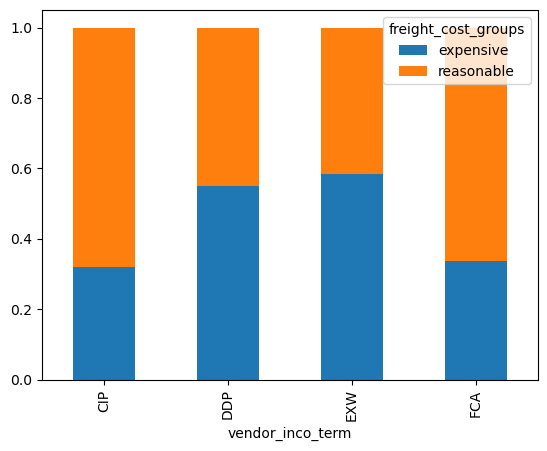

In [21]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)
# Convert props to wide format
wide_props = props.unstack()
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar', stacked=True)
plt.show()

In [22]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pg.chi2_independence(data=late_shipments,x='vendor_inco_term', y='freight_cost_groups')
# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda     chi2  dof          pval    cramer     power
0  pearson     1.0  33.6426  3.0  2.357026e-07  0.183511  0.999424


## Chi-square goodness of fit tests

The chi-square goodness of fit test is a statistical test used to determine whether an observed frequency distribution differs from a theoretical distribution. The test compares the observed frequencies with the expected frequencies, assuming that the two are equal. The chi-square statistic measures the degree of discrepancy between the observed and expected frequencies, and the p-value indicates the probability of obtaining a chi-square statistic as extreme or more extreme than the observed value, assuming that the null hypothesis is true.

The test can be used for any type of data that can be classified into categories, such as nominal or ordinal data. It is often used in biology, social sciences, and business to determine whether an observed distribution fits a theoretical model.

To conduct a chi-square goodness of fit test, the following steps are typically followed:

* Formulate the null hypothesis (H0) and the alternative hypothesis (Ha).
* Choose a level of significance (alpha).
* Collect data and organize it into categories.
* Calculate the expected frequencies for each category based on the theoretical distribution.
* Calculate the chi-square statistic by summing the squared differences between the observed and expected frequencies divided by the expected frequencies for each category.
* Determine the degrees of freedom, which is the number of categories minus one.
* Find the p-value associated with the chi-square statistic and degrees of freedom using a chi-square distribution table or a statistical software program.
* Compare the p-value to the level of significance (alpha) and make a decision about whether to reject or fail to reject the null hypothesis.

If the p-value is less than or equal to alpha, then the null hypothesis is rejected, and it is concluded that the observed distribution differs significantly from the theoretical distribution. If the p-value is greater than alpha, then the null hypothesis is not rejected, and it is concluded that the observed distribution is not significantly different from the theoretical distribution.


In [23]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Frequency table of vendor_inco_term
freq_table = late_shipments.groupby(['vendor_inco_term'])['late'].count()
hypothesized = freq_table / n_total 
hypothesized = pd.DataFrame({'vendor_inco_term': hypothesized.index, 'prop': [0.05, 0.1, 0.75, 0.1]})

# Create a DataFrame of the observed values
inco_term = freq_table.copy()
inco_term = pd.DataFrame(inco_term).reset_index()
inco_term.columns = ['vendor_inco_term', 'n']

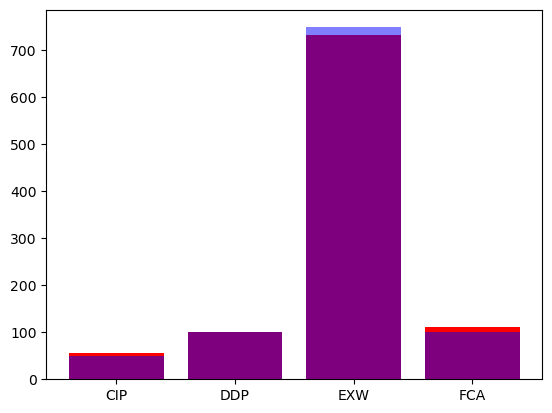

In [24]:
# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total

# Make a yellow bar graph of vendor_inco_term versus n
plt.bar(inco_term['vendor_inco_term'], inco_term['n'], color="red")

# Add blue points for hypothesized counts
plt.bar(hypothesized['vendor_inco_term'],hypothesized['n'],color='blue', alpha=0.5)
plt.show()

In [ ]:
# Perform a goodness of fit test on vendor_inco_term
gof_test = stats.chisquare(f_obs=inco_term['n'], f_exp=hypothesized['n'])
# Print gof_test results
print(gof_test)
print(f'The p-value is 0.5, so we fail to reject the null hypothesis that vendor_inco_term is distributed according to the hypothesized distribution.')

## Assumptions of Hypothesis Testing

Hypothesis testing is a statistical method used to determine whether a hypothesis is supported by the data or not. The following are the common assumptions of hypothesis testing:

1. Random Sampling: The data used in the hypothesis testing should be obtained from a random sample. A random sample ensures that the data is representative of the population being studied and reduces the risk of bias.

2. Normality: The data should follow a normal distribution. If the data is not normally distributed, transformations or non-parametric methods may need to be used.

3. Independence: The observations in the data set should be independent of each other. This means that the value of one observation should not be influenced by the value of another observation.

4. Homogeneity of Variance: The variance of the data should be consistent across all levels of the independent variable. This is known as homogeneity of variance or equal variances.

5. Hypothesis should be well-defined: The hypothesis being tested should be well-defined and testable. This means that the hypothesis should be specific and clearly state the expected outcome.

6. Significance Level: A significance level (alpha level) is chosen prior to conducting the hypothesis test, which determines the probability of making a Type I error (rejecting a true null hypothesis).

7. Sample Size: The sample size should be large enough to ensure statistical power, but not so large that it becomes unmanageable or impractical.

These assumptions may vary depending on the specific hypothesis testing technique used and the nature of the data being analyzed.

In [29]:
# Are these samples big enough for a two sample t-test?
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    454
Name: freight_cost_groups, dtype: int64
True


In [30]:
# Are these samples big enough for a one sample proportion test?
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     938
Yes     61
Name: late, dtype: int64
True


In [31]:
# Are these samples "big enough" for a chi-square independence test?
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby(['vendor_inco_term'])['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
True


In [32]:
# Are these samples big enough for an ANOVA test?
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            905
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


While all other samples are sufficent enough given the small sample of Air Charter we would be cautious of an ANOVA test

## Non-Parametric Tests

Non-parametric tests are statistical tests that do not require the assumption of a specific distribution of the data. These tests are useful when the data does not meet the assumptions of parametric tests such as normality or equal variances. Here are some common non-parametric tests:

1. Mann-Whitney U Test: This test is used to compare the median values of two independent groups. It is equivalent to the two-sample t-test but does not assume normality or equal variances.

2. Wilcoxon Signed-Rank Test: This test is used to compare the median values of two related samples. It is equivalent to the paired t-test but does not assume normality or equal variances.

3. Kruskal-Wallis Test: This test is used to compare the median values of three or more independent groups. It is equivalent to the one-way ANOVA but does not assume normality or equal variances.

4. Friedman Test: This test is used to compare the median values of three or more related samples. It is equivalent to the repeated measures ANOVA but does not assume normality or equal variances.

5. Spearman's Rank Correlation: This test is used to measure the strength and direction of the relationship between two variables when the data is not normally distributed.

6. Kendall's Tau Correlation: This test is used to measure the strength and direction of the relationship between two variables when the data is not normally distributed.

These non-parametric tests are just a few examples and there are many other non-parametric tests available depending on the specific research question and data type.

### Wilcoxon Signed-Rank Test

The Wilcoxon signed-rank test is a non-parametric statistical test used to compare the median values of two related samples. It is used when the data does not meet the assumptions of the paired t-test, such as normality or equal variances. The Wilcoxon signed-rank test is a one-sample test, which means that it tests whether the median difference between the two related samples is significantly different from zero.

The following are the steps for performing the Wilcoxon signed-rank test:

1. State the null hypothesis and alternative hypothesis. The null hypothesis states that there is no significant difference between the two related samples, while the alternative hypothesis states that there is a significant difference.

2. Calculate the differences between the paired observations. The difference should be calculated by subtracting the second observation from the first observation.

3. Rank the absolute values of the differences. The absolute values of the differences are ranked from smallest to largest. If there are ties, the ranks are averaged.

4. Calculate the test statistic. The test statistic is the sum of the ranks of the positive differences or the sum of the ranks of the negative differences, whichever is smaller. The test statistic follows a Wilcoxon signed-rank distribution.

5. Determine the p-value. The p-value is calculated from the Wilcoxon signed-rank distribution table or a statistical software program. If the p-value is less than the significance level (alpha), then the null hypothesis is rejected in favor of the alternative hypothesis.

6. Interpret the results. If the null hypothesis is rejected, then there is a significant difference between the two related samples. If the null hypothesis is not rejected, then there is no significant difference. The effect size can also be calculated using Cohen's d or other measures.

In [33]:
# Conduct a paired t-test on the percentage columns using an appropriate alternative hypothesis.
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pg.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True,
                                     alternative="two-sided")

# Print paired t-test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


In [34]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pg.wilcoxon(x=sample_dem_data['dem_percent_12'],
                                        y=sample_dem_data['dem_percent_16'],
                                        alternative='two-sided')



# Print Wilcoxon test results
wilcoxon_test_results

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,2401.0,two-sided,1.780396e-77,0.961661,0.644816


Given the large sample size (500), you obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.

### Non-Parametric ANOVA and unpaired t-test

In [35]:
# Choose the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms','late']]
# Convert weight_vs_late into wide format
weight_vs_late_wide = pd.pivot(weight_vs_late,values='weight_kilograms' ,columns='late')
# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pg.mwu(x=weight_vs_late_wide["No"],y=weight_vs_late_wide['Yes'],alternative='two-sided')
# Print the test results
wmw_test

,U-val,alternative,p-val,RBC,CLES
MWU,19131.0,two-sided,0.000014,0.331294,0.334353


The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late. The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.

### Kruskal-Wallis Test

The Kruskal-Wallis test is a non-parametric statistical test used to compare the median values of three or more independent groups. It is used when the data does not meet the assumptions of the one-way ANOVA, such as normality or equal variances. The Kruskal-Wallis test is a one-way test, which means that it tests whether the median values of the three or more independent groups are significantly different from each other.

In [36]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pg.kruskal(data=late_shipments,dv='weight_kilograms',between='shipment_mode')
# Print the results
kw_test

,Source,ddof1,H,p-unc
Kruskal,shipment_mode,2,124.983244,7.248254e-28


The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. The Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.

#### Cheat Sheet

Lastly this is a cheatsheet I found that has come in handy for me. I hope it helps you too! </br>
Nominal Data also means categorical data. </br> </br>
![](https://i.pinimg.com/564x/f6/b1/aa/f6b1aaca8fc74b3cc6d7b5334fc9519c.jpg)